In [2]:
#%matplotlib widget
%matplotlib inline
%config InlineBackend.figure_format='svg'


In [5]:
import pygimli as pg
from pygimli import meshtools as mt

In [6]:
world = mt.createWorld(start=[-20, 0], end=[20, -16])

(<AxesSubplot:>, None)

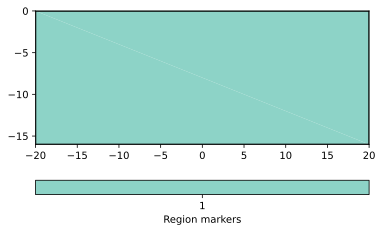

In [35]:
pg.show(world,
       #boundaryMarkers=True
       )

(<AxesSubplot:>, None)

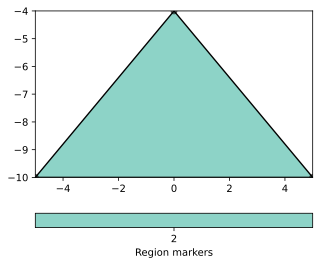

In [34]:
body = mt.createPolygon([[-5, -10],[5, -10], [0, -4]], isClosed=True, marker=2,
                        #addNodes=4, 
                        #interpolate='spline', 
                        )
pg.show(body, showNodes=True)

(<AxesSubplot:>, None)

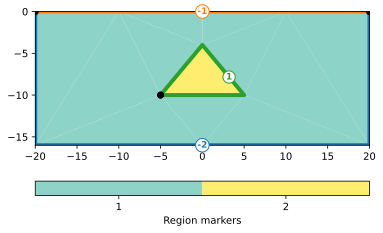

In [39]:
geom = world + body
pg.show(geom, boundaryMarkers=True)

(<AxesSubplot:>, None)

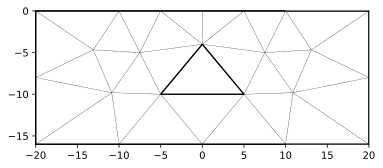

In [40]:
mesh = mt.createMesh(geom, 
                     #area=1.0, 
                     #smooth=[2, 4]
                    )
pg.show(mesh)

In [41]:
T = pg.solver.solve(mesh,
                    a=[[1, 1.0], [2, 20.0]],
                    bc={'Dirichlet':{-1:1.0, -2:0.0}},
                    verbose=True)


Mesh:  Mesh: Nodes: 23 Cells: 30 Boundaries: 52
Assembling time:  0.001
Solving time:  0.0


/home/carsten/src/gimli.dev/gimli/pygimli/viewer/mpl/colorbar.py:272: MatplotlibDeprecationWarning: 
The ax attribute was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  if hasattr(gci, 'ax'):
/home/carsten/src/gimli.dev/gimli/pygimli/viewer/mpl/colorbar.py:273: MatplotlibDeprecationWarning: 
The ax attribute was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  ax = gci.ax


saving: T_field.pdf ...
.. done


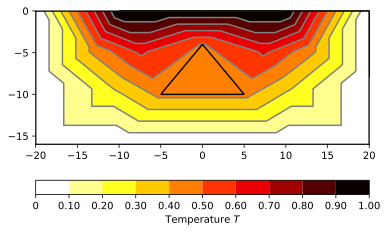

In [42]:
ax, _ = pg.show(mesh, data=T, label='Temperature $T$', cMap="hot_r",
                nLevs=11, showBoundary=True)
